In [192]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# Load the train and test dataset
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

print("Train shape: ", train.shape)
print("Test shape: ",test.shape)

Train shape:  (891, 12)
Test shape:  (418, 11)


In [194]:
# Explore the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
# Observe the data types and null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [196]:
# Inspect value counts
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

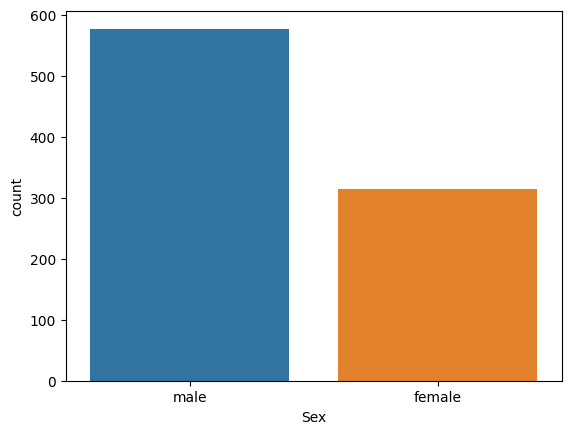

In [197]:
sns.countplot(x = "Sex", data=train)

In [198]:
train["Pclass"].value_counts()
# 1 -> Upper
# 2 -> Middle
# 3 -> Lower 

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

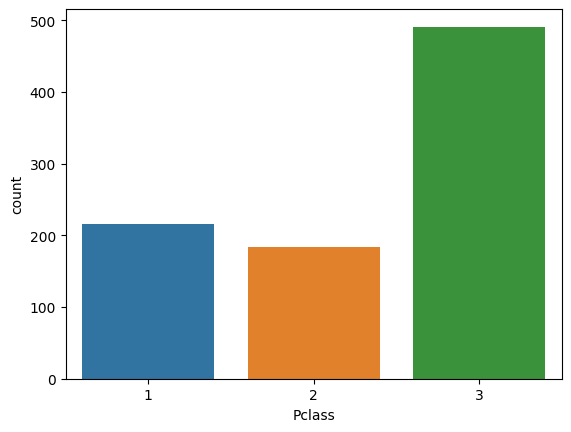

In [199]:
sns.countplot(x="Pclass", data=train)

In [200]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

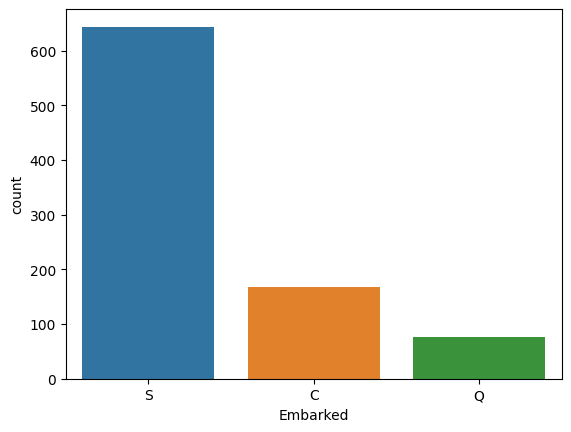

In [201]:
sns.countplot(x='Embarked', data=train)

In [202]:
# Number of siblings
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

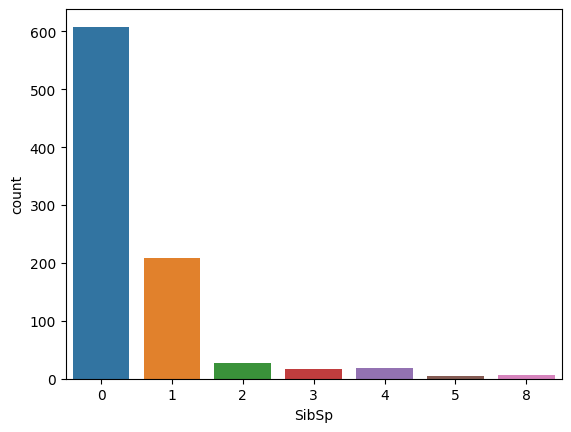

In [203]:
sns.countplot(x='SibSp', data=train)

In [204]:
# Adding new feature
train["Died"] = 1 - train["Survived"]

<AxesSubplot:xlabel='Sex'>

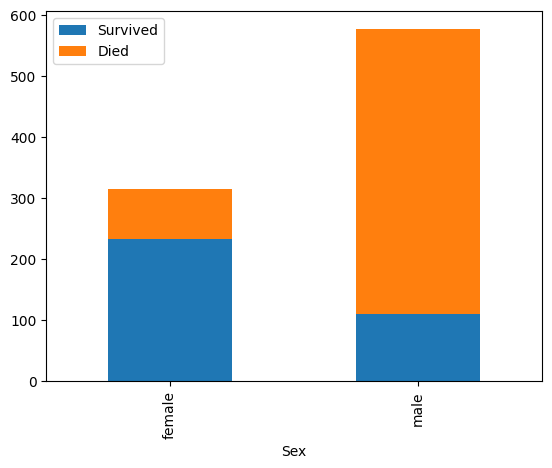

In [205]:
# Visualizing survival based on the gender
train.groupby("Sex").agg("sum")[["Survived","Died"]].plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='Sex'>

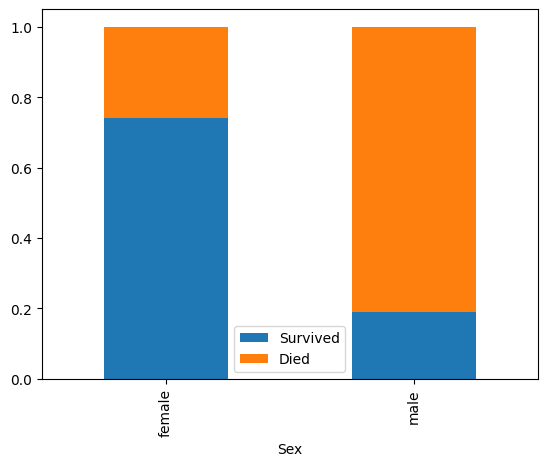

In [206]:
# Plotting the same graph but with ratio instead
train.groupby("Sex").agg("mean")[["Survived","Died"]].plot(kind="bar",stacked=True)

###### As you can see on the mortality rates above, the sex variable seems to be an important feature. Women are more likely to survive.

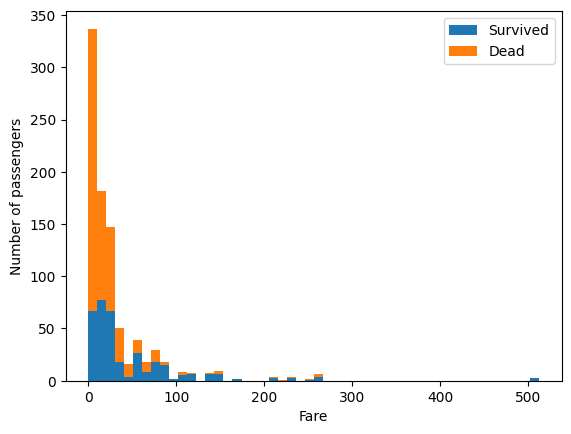

In [207]:
# Visualizing the survival based on the fare. 
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], 
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

###### Passengers with cheaper ticket fares are more likely to die. Put differently, passengers with more expensive tickets, and therefore a more important social status, seem to be rescued first.

In [208]:
# Feature Engineering
titles = set()
for name in train["Name"]:
    titles.add(name.split(",")[1].split(".")[0].strip())
print(titles)

{'Master', 'Mlle', 'the Countess', 'Mme', 'Don', 'Jonkheer', 'Col', 'Ms', 'Miss', 'Mr', 'Major', 'Lady', 'Dr', 'Sir', 'Capt', 'Mrs', 'Rev'}


In [209]:
Title_Dictionary = {"Capt": "Officer","Col": "Officer","Major": "Officer",
"Jonkheer": "Royalty","Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer",
"the Countess":"Royalty","Mme": "Mrs","Mlle": "Miss","Ms": "Mrs","Mr" : "Mr"
,"Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [210]:
train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train['Title'] = train.Title.map(Title_Dictionary)
train.head()

# A new column added

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [211]:
# Data cleaning
df1 = train.drop(["Name", "Ticket", "Cabin", "PassengerId", "Died"], axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [212]:
train.Title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [213]:
# Converting categorical features to numeric ones
df1.Sex = df1.Sex.map({"female":0, "male":1})
df1.Embarked = df1.Embarked.map({"S":0, "C":1, "Q":2, "nan":"Nan"})
df1.Title=df1.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,0,0


In [214]:
# median age of each sex
median_age_men = df1[df1["Sex"] == 1]["Age"].median()
median_age_women=df1[df1['Sex']==0]['Age'].median()
print(median_age_men, median_age_women)

29.0 27.0


In [215]:
# filling null values in "Age" with respective median age
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age']=median_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age']=median_age_men

In [216]:
# checking for null values
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [217]:
# dropping rows with the null value
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 69.5+ KB


In [218]:
# Feature Scaling (Min-Max Normalization)
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))

df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.364099,0.524184,0.382452,0.062649,0.733408
std,0.486260,0.834700,0.477538,0.163160,1.103705,0.806761,0.097003,1.051499
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412,0.000000
50%,0.000000,3.000000,1.000000,0.359135,0.000000,0.000000,0.028213,0.000000
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508,1.000000
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,5.000000


In [219]:
# Split train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1.drop(["Survived"],axis=1),df1.Survived,test_size=0.2,random_state=0,stratify=df1.Survived)

In [220]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
y_pred = logistic_regressor.predict(X_test)
accuracy_score(y_test,y_pred)

0.8426966292134831

In [221]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

grid = {"n_neighbors": [2,4,6,8,10,12,14,16,18,20],
"leaf_size" : list(range(1,50,5)),
"metric": ["minkowski", "euclidean", "manhattan"]}

gs = GridSearchCV(knn, param_grid=grid, cv=10, scoring="roc_auc", verbose=5)
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

knn = gs.best_estimator_

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
[CV 1/10] END leaf_size=1, metric=minkowski, n_neighbors=2;, score=0.787 total time=   0.0s
[CV 2/10] END leaf_size=1, metric=minkowski, n_neighbors=2;, score=0.791 total time=   0.0s
[CV 3/10] END leaf_size=1, metric=minkowski, n_neighbors=2;, score=0.814 total time=   0.0s
[CV 4/10] END leaf_size=1, metric=minkowski, n_neighbors=2;, score=0.722 total time=   0.0s
[CV 5/10] END leaf_size=1, metric=minkowski, n_neighbors=2;, score=0.811 total time=   0.0s
[CV 6/10] END leaf_size=1, metric=minkowski, n_neighbors=2;, score=0.763 total time=   0.0s
[CV 7/10] END leaf_size=1, metric=minkowski, n_neighbors=2;, score=0.788 total time=   0.0s
[CV 8/10] END leaf_size=1, metric=minkowski, n_neighbors=2;, score=0.793 total time=   0.0s
[CV 9/10] END leaf_size=1, metric=minkowski, n_neighbors=2;, score=0.748 total time=   0.0s
[CV 10/10] END leaf_size=1, metric=minkowski, n_neighbors=2;, score=0.728 total time=   0.0s
[CV 1/10] END 

In [222]:
# SVM
from sklearn.svm import SVC

svc = SVC()

param_grid = {"C": [0.1, 1, 10, 100, 1000], 
"gamma": [1, 0.1, 0.01, 0.001, 0.0001],
"kernel": ["rbf"]}

gs = GridSearchCV(SVC(), param_grid, refit = True, verbose = 5)
gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

svc = gs.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.831 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.817 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.817 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.754 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.608 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [223]:
predictions = [logistic_regressor.predict(X_test),svc.predict(X_test), knn.predict(X_test)]
print(predictions[0][100],predictions[1][100],predictions[2][100])
type(predictions[0])

1 1 1


numpy.ndarray

In [224]:
class HardVoting:
    def __init__(self,models):
        self.models = models
    def vote(self,data):
        predictions = []
        for model in self.models:
            predictions.append(model.predict(data))
        result = []
        for i in range(0,len(predictions[0])):
            lr_p = predictions[0][i]
            svc_p = predictions[1][i]
            knn_p = predictions[2][i]
            from collections import Counter
            c = Counter([lr_p, svc_p, knn_p])
            value, count = c.most_common()[0]
            result.append(value)
        return np.array(result)


In [225]:
hardvoter = HardVoting([logistic_regressor,svc,knn])
predictions = hardvoter.vote(X_test)
accuracy_score(y_test,predictions)

0.8539325842696629

In [226]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[99, 11],
       [15, 53]], dtype=int64)

<AxesSubplot:>

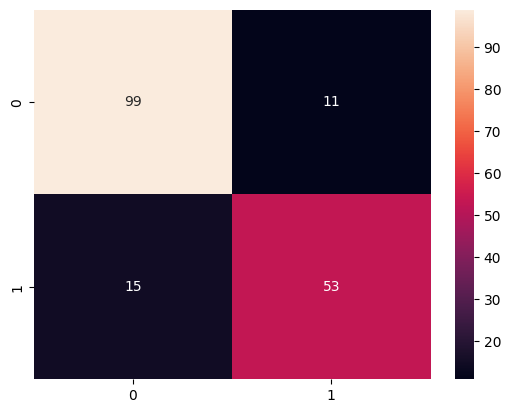

In [227]:
sns.heatmap(cm,annot=True)

In [228]:
# Load submission test dataset
test = pd.read_csv("./test.csv")

In [229]:
titles = set()
for name in test['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Master', 'Col', 'Ms', 'Miss', 'Mr', 'Dr', 'Mrs', 'Dona', 'Rev'}


In [230]:
test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title'] = test.Title.map(Title_Dictionary)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [231]:
# dropping unwanted columns
df2=test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [232]:
# Converting categorical feature to numeric
df2.Sex=df2.Sex.map({'female':0, 'male':1})
df2.Embarked=df2.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'nan'})
df2.Title=df2.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,2,0.0
1,3,0,47.0,1,0,7.0000,0,2.0
2,2,1,62.0,0,0,9.6875,2,0.0
3,3,1,27.0,0,0,8.6625,0,0.0
4,3,0,22.0,1,1,12.2875,0,2.0


In [233]:
# Checking for null values
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        1
dtype: int64

In [234]:
# median age of each sex
median_age_men2=df2[df2['Sex']==1]['Age'].median()
median_age_women2=df2[df2['Sex']==0]['Age'].median()

In [235]:
# filling null values with respective median age
df2.loc[(df2.Age.isnull()) & (df2['Sex']==0),'Age']=median_age_women2
df2.loc[(df2.Age.isnull()) & (df2['Sex']==1),'Age']=median_age_men2

In [236]:
# filling null values with median fare
df2['Fare']=df2['Fare'].fillna(df2['Fare'].median())

In [237]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       1
dtype: int64

In [238]:
# Null value in the title column
df2[df2.Title.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
414,1,0,39.0,0,0,108.9,1,NaN


In [248]:
# Prediction for submission

prediction = hardvoter.vote(df2)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [251]:
# Submission file created

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
})
submission.to_csv('submission.csv', index=False)
pred_df = pd.read_csv('submission.csv')
